# Trabalho Final de NLP

## TURMA: FIAP-8IA 
### Alunos
* ALEX DIAS DE ARAUJO - RM 334983
* ANDRE LUIZ SILVA RODRIGUES - RM 334911
* JOSÉ ANTONIO WESLEY CRUZ - RM 334341
* PAULO ARAUJO BARBOSA - RM 335284

In [35]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

## 1) Importando o dataset

In [2]:
import pandas as pd
import nltk
import seaborn as sb

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics

# Importe as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import cross_val_predict


import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('https://s3.amazonaws.com/aulas-fiap/imdb-reviews-pt-br.csv')
df.shape

(49459, 4)

#### a) Fazendo o embaralhamento dos dados, pois o dataset está ordenado.

In [4]:
from sklearn.utils import shuffle
df = shuffle(df)

In [5]:
df.head(15)

,id,text_en,text_pt,sentiment
24689,24691,What can I say? The little kid inside has alwa...,O que posso dizer? A criança dentro sempre tev...,pos
22529,22531,The best Batman movie of the 90s no doubt abou...,"O melhor filme de Batman dos anos 90, sem dúvi...",pos
29351,29353,"By my ""Kool-Aid drinkers"" remark, I mean that ...","Pelo meu comentário ""Kool-Aid bebedores"", quer...",neg
28473,28475,Assassin Hausers John Cusak mission is to whac...,Assassin Hausers A missão de John Cusak é atac...,neg
39594,39596,Ive seen this movie after watching Paltrows ve...,Eu vi esse filme depois de assistir a versão d...,pos
17273,17275,"Usually, Alan Alda plays characters that are t...","Normalmente, Alan Alda interpreta personagens ...",pos
36066,36068,"Now for the truth, its very very weak storylin...","Agora, para a verdade, seu enredo muito fraco ...",neg
16292,16294,"In 1895, in a small village in Japan, the wife...","Em 1895, em uma pequena aldeia no Japão, a esp...",pos
7210,7212,Dr. Chopper starts shortly after teenager Nich...,Dr. Chopper começa logo depois que o adolescen...,neg
726,727,The characterization in this movie is among th...,A caracterização deste filme está entre as pio...,neg


## 2) Checking for missing values
**É fácil checar missing values usando método isnull() com o método sum(), o número retornado condiz com a quantidade True para o teste, ou seja, quantidade de valores nulos nas variaveis**

In [6]:
df.isnull().sum()

id           0
text_en      0
text_pt      0
sentiment    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49459 entries, 24689 to 2133
Data columns (total 4 columns):
id           49459 non-null int64
text_en      49459 non-null object
text_pt      49459 non-null object
sentiment    49459 non-null object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


#### a) Como estamos construindo um modelo para classificar o sentimento, nosso alvo será a variável "sentiment" do dataframe 'df'.
**Para ter certeza de que é uma variável binária, vamos usar a função countplot () do Seaborn.**

In [8]:
df.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

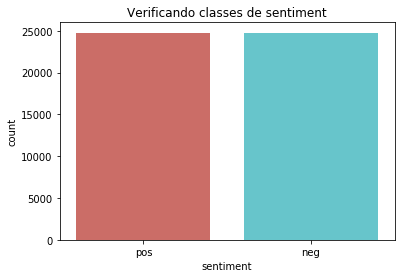

In [9]:
plot = sb.countplot(x='sentiment',data=df, palette='hls')
plt.title("Verificando classes de sentiment")
plt.show(plot)

## 3) Tratamento dos dados

#### a) Aplicando One Hot Encoding na classe

In [10]:
df['classe'] = df['sentiment'].replace(['neg','pos'],[0,1])

In [11]:
df.head()

,id,text_en,text_pt,sentiment,classe
24689,24691,What can I say? The little kid inside has alwa...,O que posso dizer? A criança dentro sempre tev...,pos,1
22529,22531,The best Batman movie of the 90s no doubt abou...,"O melhor filme de Batman dos anos 90, sem dúvi...",pos,1
29351,29353,"By my ""Kool-Aid drinkers"" remark, I mean that ...","Pelo meu comentário ""Kool-Aid bebedores"", quer...",neg,0
28473,28475,Assassin Hausers John Cusak mission is to whac...,Assassin Hausers A missão de John Cusak é atac...,neg,0
39594,39596,Ive seen this movie after watching Paltrows ve...,Eu vi esse filme depois de assistir a versão d...,pos,1


#### b) Passando todos caracteres para letra minúscula

In [12]:
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrerodrigues/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df['texto_proc'] = df.text_pt.apply(lambda texto: texto.lower())

df.head()

,id,text_en,text_pt,sentiment,classe,texto_proc
24689,24691,What can I say? The little kid inside has alwa...,O que posso dizer? A criança dentro sempre tev...,pos,1,o que posso dizer? a criança dentro sempre tev...
22529,22531,The best Batman movie of the 90s no doubt abou...,"O melhor filme de Batman dos anos 90, sem dúvi...",pos,1,"o melhor filme de batman dos anos 90, sem dúvi..."
29351,29353,"By my ""Kool-Aid drinkers"" remark, I mean that ...","Pelo meu comentário ""Kool-Aid bebedores"", quer...",neg,0,"pelo meu comentário ""kool-aid bebedores"", quer..."
28473,28475,Assassin Hausers John Cusak mission is to whac...,Assassin Hausers A missão de John Cusak é atac...,neg,0,assassin hausers a missão de john cusak é atac...
39594,39596,Ive seen this movie after watching Paltrows ve...,Eu vi esse filme depois de assistir a versão d...,pos,1,eu vi esse filme depois de assistir a versão d...


#### c) Eliminando colunas que não interessam para o modelo

In [15]:
df1 = df.drop(columns=['id','text_en','text_pt','sentiment'], axis=1)
df1

,classe,texto_proc
24689,1,o que posso dizer? a criança dentro sempre tev...
22529,1,"o melhor filme de batman dos anos 90, sem dúvi..."
29351,0,"pelo meu comentário ""kool-aid bebedores"", quer..."
28473,0,assassin hausers a missão de john cusak é atac...
39594,1,eu vi esse filme depois de assistir a versão d...
...,...,...
1266,0,"as questões centrais em jogo, god & satan / go..."
15262,1,"embora eu seja uma garota, felizmente eu tenho..."
12611,1,um dos melhores filmes ocidentais de todos os ...
12637,1,"como um leitor ávido de clive barker, eu realm..."


## 4) VECTORIZING

* Enquanto o processo de Tokenização separa o texto em pequenos trechos, normalmente uma palavra ou símbolo, (token) a vetorização é o processo de agregar medidas aos tokens ou n-gramas para gerar features

* Uma vez que geramos as features aplicando uma das estratégias de vetorização, fica simples treinar um modelo de machine learning para, por exemplo, classificar documentos.

#### VETORIZAÇÃO POR CONTAGEM

In [17]:
# vect = CountVectorizer(ngram_range=(1,1), stop_words=stopwords)
# # vect = CountVectorizer(ngram_range=(2,2))
# vect.fit(df1.texto_proc)
# text_vect = vect.transform(df1.texto_proc)   
# print(text_vect.shape)

**O problema na vetorização por contagem é que pode haver uma grande disparidade entre os documentos levando o algoritmo a dar maior relevância para aqueles com maior número de palavras ou tokens repetidos. Portanto, não usaremos essa forma de vetorização.**

#### TF - Frequência de Termos

* Consiste na frequência relativa de um mesmo n-grama ou token em um documento.

In [18]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vect = TfidfVectorizer(ngram_range=(1,1), use_idf=True, norm='l2', stop_words=stopwords)
# # vect = TfidfVectorizer(ngram_range=(2,2), use_idf=True, norm='l1')
# vect.fit(df1.texto_proc)
# tf_vect = vect.transform(df1.texto_proc)
# print(tf_vect.shape)

**O problema do TF é que, assim como a Contagem de Termos, os n-gramas que aparecem com maior frequência irão desbalancear as features e nem sempre os termos que se repetem muito agregarão informação. Portanto, não usaremos essa forma de vetorização.**

#### TF-IDF

* É a combinação da frequência de termos multiplicado com um elemento de “peso”,  o inverso da frequência em documentos define o “peso” que será usado.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
nltk.download('punkt')

trans_table = {ord(x): None for x in string.punctuation + string.digits}    

def tokenize(text):
        # Remover pontuação e dígitos de qualquer palavra com pelo menos dois caracteres. 
        tokens = [word for word in nltk.word_tokenize(text.translate(trans_table), language="portuguese") if len(word) > 1] #if len(word) > 1 
        return tokens

vect = TfidfVectorizer(
    ngram_range=(1,2)  # (1, 2) means unigrams and bigrams.
    , use_idf=True     # Enable inverse-document-frequency reweighting.
    , norm='l2'        # ‘l2’: Sum of squares of vector elements is 1. 
                       # The cosine similarity between two vectors is their dot product when l2 norm has been applied.
    , tokenizer = tokenize  
    , stop_words=stopwords
    , max_df=0.9         # When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold
    , min_df=2           # When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. 
    , analyzer = 'word'  # Whether the feature should be made of word or character n-grams.
    , strip_accents = 'unicode' # Remove accents and perform other character normalization during the preprocessing step.
)

vect.fit(df1.texto_proc)
tfidf_vect = vect.transform(df1.texto_proc)
print(tfidf_vect.shape)

(49459, 659746)


**Foram testadas diversas combinações de parametrização do vetorizador TF-IDF até encontrar aquela que produzisse a melhor acurácia. Segue abaixo o resumo desses testes:**

![](https://i.ibb.co/VT3zNqg/Screen-Shot-2019-12-21-at-07-02-17.png)


## 5) Testando acurácia obtida pelos Classificadores

#### a) Separating Train and Test samples for KNN, DT, NB, RF and AB

In [21]:
X = tfidf_vect
# X = StandardScaler(with_mean=False).fit_transform(tfidf_vect) #Verificamos que a normalização dos dados produzia baixa acurácia 
y = df1.classe

X_train,X_test,y_train,y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, # Vamos usar a relação 80/20 para separar os dados de treino e teste.
    random_state = 13
)

#### b) KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_pred_knn, y_test)
print(accuracy) 

cm = confusion_matrix(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn))
print(metrics.accuracy_score(y_test, y_pred_knn))

0.8053983016579054
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4930
           1       0.80      0.81      0.81      4962

    accuracy                           0.81      9892
   macro avg       0.81      0.81      0.81      9892
weighted avg       0.81      0.81      0.81      9892

0.8053983016579054


#### c) Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

# tree = DecisionTreeClassifier(random_state=42)
# tree.fit(X_train, y_train)
# print('D Tree: ', tree.score(X, df['classe']))


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy = accuracy_score(y_pred_dt, y_test)
print(accuracy)


cm = confusion_matrix(y_test, y_pred_dt)
print(classification_report(y_test, y_pred_dt))
print(metrics.accuracy_score(y_test, y_pred_dt))

0.7097654670440761
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      4930
           1       0.71      0.71      0.71      4962

    accuracy                           0.71      9892
   macro avg       0.71      0.71      0.71      9892
weighted avg       0.71      0.71      0.71      9892

0.7097654670440761


#### d) Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

modelRfc= RandomForestClassifier(random_state=1)
modelRfc.fit(X_train, y_train)
modelRfc.score(X_test,y_test)

0.7640517589971695

#### e) Boosting utilizando  o algoritmo AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

modelADB = AdaBoostClassifier(random_state=1, n_estimators = 25)
modelADB.fit(X_train, y_train)
modelADB.score(X_test,y_test)

0.761928831378892

### f) Support Vector Machine

#### i) Faz a validação via crossvalidation (k-fold)

In [24]:
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y,resultados)

#### ii) Treinamento do Modelo

In [25]:
#Calculo do MinMaxScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

In [26]:
#Calculo do StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#z = (x - u) / s - where u is the mean of the training samples and and s is the standard deviation of the training samples

In [27]:
pip_1 = Pipeline([
#     ('scaler',StandardScaler(with_mean=False)), #Verificamos que a normalização dos dados produzia baixa acurácia 
    ('clf', svm.SVC())
])

# pip_2 = Pipeline([
# #     ('min_max_scaler', MaxAbsScaler()), #Verificamos que a normalização dos dados produzia baixa acurácia 
#     ('clf', svm.SVC())
# ])

# pip_3 = Pipeline([
# #     ('scaler',StandardScaler(with_mean=False)),
#     ('clf', svm.SVC(kernel='rbf'))
# ])

pip_4 = Pipeline([
#     ('scaler',StandardScaler(with_mean=False)),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
#     ('scaler',StandardScaler(with_mean=False)),
    ('clf', svm.SVC(kernel='linear'))
])

pip_6 = Pipeline([
#     ('scaler',StandardScaler(with_mean=False)),
    ('clf', svm.LinearSVC()) # Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, 
                             # so it has more flexibility in the choice of penalties and loss functions and should scale better to large 
                             # numbers of samples.
])

#### iii) Teste de acurácia usando o pipeline 'pip_1'

In [28]:
Acuracia(pip_1, tfidf_vect, df1.classe)

0.5007177662306153

#### iv) Teste de acurácia usando o pipeline 'pip_2'

In [29]:
# Acuracia(pip_2, tfidf_vect, df1.classe)

#### v) Testando Kernels 

**Kernel rbf**

In [30]:
# Acuracia(pip_3, tfidf_vect, df1.classe) --> Identico ao resultado já obtido no pip_1

**Kernel Polynomial**

In [31]:
Acuracia(pip_4, tfidf_vect, df1.classe)

0.5007177662306153

**Kernel Linear**

In [32]:
Acuracia(pip_5, tfidf_vect, df1.classe)

0.9072160779635657

In [33]:
Acuracia(pip_6, tfidf_vect, df1.classe)

0.9079035160435917

#### A melhor acurácia encontrada com Classificadores foi de 90.79% usando SVM com kernel linear e parametrização default.